In [20]:
import torch
from torch.utils.data import Dataset

from torchvision import transforms

from sklearn.metrics import confusion_matrix
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader

from torchvision.datasets import ImageFolder
from torchvision import models
from torchvision.models.alexnet import AlexNet_Weights

import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

from side_code import CNN
from side_code import train_test


class HorizontallyFlippedDataset(Dataset):
    def __init__(self, original_dataset):
        self.original_dataset = original_dataset
        self.horizontal_flip_transform = transforms.RandomHorizontalFlip(p=1)

    def __getitem__(self, index):
        image, label = self.original_dataset[index]
        flipped_image = self.horizontal_flip_transform(image)
        return flipped_image, label

    def __len__(self):
        return len(self.original_dataset)
    



# Setting a seed for reproducibility of the results

torch.manual_seed(1)

#  Load the dataset

train_path = '/Users/Gaia/Desktop/prova'

train = ImageFolder(root=train_path, transform=train_test.transform)




# Data augmentation for the train dataset

flipped_dataset_train = HorizontallyFlippedDataset(train)


# Create the loaders

batch_size = 32 # batch_size = 32 as required by the project
train_loader = DataLoader(train, batch_size, shuffle=False) 
flipped_train_loader = DataLoader(flipped_dataset_train, batch_size, shuffle=False) 

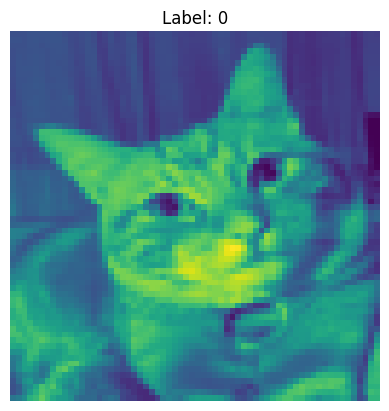

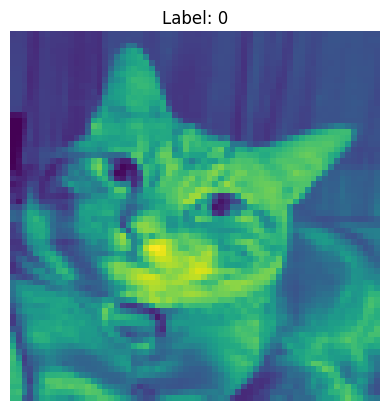

In [21]:
sample_image, sample_label = train[0]
sample_image_np = np.transpose(sample_image.numpy(), (1, 2, 0))
plt.imshow(sample_image_np)
plt.title(f'Label: {sample_label}')
plt.axis('off')
plt.show()

# Visualize an image from the flipped dataset
flipped_sample_image, flipped_sample_label = flipped_dataset_train[0]
flipped_sample_image_np = np.transpose(flipped_sample_image.numpy(), (1, 2, 0))
plt.imshow(flipped_sample_image_np)
plt.title(f'Label: {flipped_sample_label}')
plt.axis('off')
plt.show()


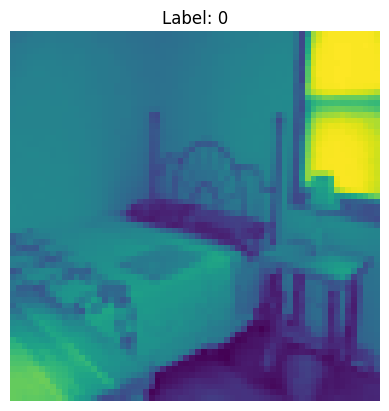

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a data loader, e.g., train_loader
# Assuming the batch size is 4 for demonstration purposes
batch_size = 4

# Create an iterator from the data loader
data_iter = iter(flipped_train_loader)  # Replace train_loader with your DataLoader

# Get a batch of data
images, labels = next(data_iter)

# Visualize the third image
image_to_visualize = images[2].numpy()

# Transpose to (H, W, C) for proper visualization
image_to_visualize = np.transpose(image_to_visualize, (1, 2, 0))

# Plot the image
plt.imshow(image_to_visualize)
plt.title(f'Label: {labels[2]}')
plt.axis('off')
plt.show()
